Iteration: 0, Loss: 2164.2190415415835,  b: 0.003117757642403632, w: 0.45882017755120524
Iteration: 100, Loss: 583.5152496735025,  b: -0.02721691731735072, w: 0.34468109109980416
Iteration: 200, Loss: 583.3422840785094,  b: -0.05662347283999153, w: 0.34489983637142047
Iteration: 300, Loss: 583.1702259577812,  b: -0.08595278529444121, w: 0.34511800705836915
Iteration: 400, Loss: 582.9990705502003,  b: -0.11520505757734904, w: 0.3453356046699287
Iteration: 500, Loss: 582.8288131196289,  b: -0.14438049205240977, w: 0.3455526307114131
Iteration: 600, Loss: 582.6594489547766,  b: -0.17347929055176328, w: 0.3457690866841825
Iteration: 700, Loss: 582.4909733690724,  b: -0.20250165437739126, w: 0.3459849740856531
Iteration: 800, Loss: 582.3233817005328,  b: -0.2314477843025094, w: 0.346200294409308
Iteration: 900, Loss: 582.156669311634,  b: -0.2603178805729566, w: 0.3464150491447073
Mean Squared Error: 571.5384392219382


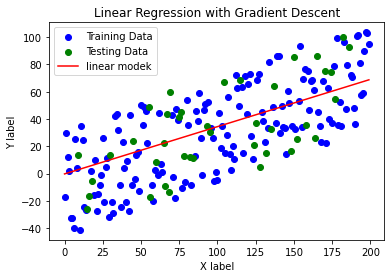

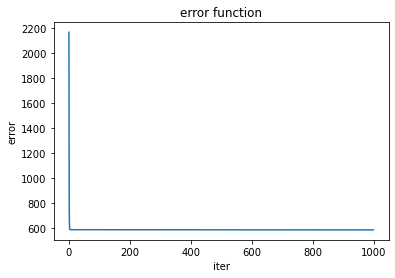

In [3]:
#abdelrahman ramadan 20200284 s2          Mohamed Refaat mohamed 20200443 s3              Ahmed Essam  20200028  s3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate dataset
np.random.seed(42)
x = np.arange(200)
delta = np.random.uniform(-50, 30, size=(200,))
y = 0.4*x + 3 + delta

# Spliting dataset ( 80 : 20 )%
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define linear regression model (w and b, using in [updates])
b = 0
w = 0
alpha = 0.0001

# Define mean squared error loss function
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Define gradient descent algorithm
def gradient_descent(X, Y, b, w, alpha, _iterations):
    n = len(X)
    losses = []
    b_vals = []
    w_vals = []
    for i in range(_iterations):
        y_pred = w*X + b 
        error = y_pred - Y
        b = b - alpha * (1/n) * np.sum(error)
        w = w - alpha * (1/n) * np.sum(error*X)
        loss = mean_squared_error(Y, y_pred)
        losses.append(loss)
        b_vals.append(b)
        w_vals.append(w)
        if i % 100 == 0:
            print(f"Iteration: {i}, Loss: {loss},  b: {b}, w: {w}")
    return b, w, losses, b_vals, w_vals

# Train the model
_iterations = 1000
b, w, losses, b_vals, w_vals = gradient_descent(X_train, Y_train, b, w, alpha, _iterations)

# Make predictions on test data
y_pred = w*X_test + b 
mean_error = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mean_error}")

# Plot the data and the line of best fit
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='green', label='Testing Data')
plt.plot(x, b + w*x, color='red', label='linear modek')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.legend()
plt.show()

# Plot the loss curve
plt.plot(losses)
plt.title('error function')
plt.xlabel('iter')
plt.ylabel('error')
plt.show()